In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

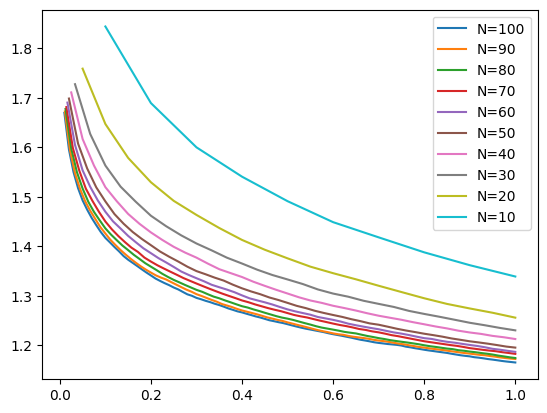

In [7]:
deltas = jnp.array(
    [1 / 100, 1 / 90, 1 / 80, 1 / 70, 1 / 60, 1 / 50, 1 / 40, 1 / 30, 1 / 20, 1 / 10])  #
Ndeltas = jnp.ceil(1 / deltas)
Mdeltas = jnp.ones((len(deltas),))
Mdeltas = jnp.ceil(1 / jnp.sqrt(deltas))
Mdeltas = jnp.ones((len(deltas),)) * 1_000
fineDeltas = Mdeltas
prefix = "IBM"
folder = "./"
for delta, n in zip(deltas, range(len(Ndeltas))):
    N = Ndeltas[n]
    M = Mdeltas[n]
    fine = fineDeltas[n]
    paths_1 = jnp.load(f'{folder}/{prefix}_pathwise_sols_{N}_{M}')
    paths_2 = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fine}')
    N += 1
    assert N == len(paths_1[0]) == len(paths_2[0])
    ts = jnp.linspace(0, 1, N)
    ranged = range(N)
    plt.plot(ts, -jnp.log(jnp.mean(jnp.linalg.norm(paths_1 - paths_2, axis=-1), axis=0)) / jnp.log(N - 1),
             label=f'N={N - 1}')
plt.legend()

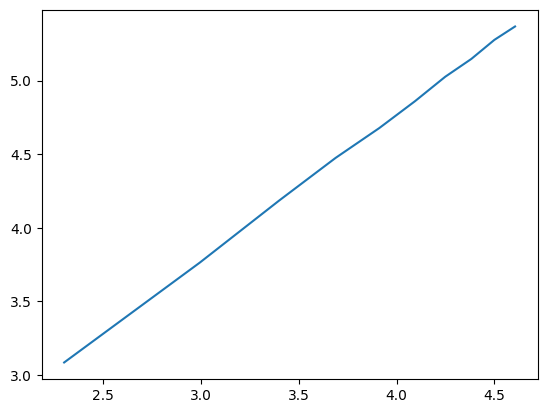

In [9]:
errors = []
for delta, n in zip(deltas, range(len(Ndeltas))):
    N = Ndeltas[n]
    M = Mdeltas[n]
    fine = fineDeltas[n]
    paths_1 = jnp.load(f'{folder}/{prefix}_pathwise_sols_{N}_{M}')
    paths_2 = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fine}')
    N += 1
    assert N == len(paths_1[0]) == len(paths_2[0])
    error = jnp.mean(jnp.linalg.norm(paths_1[:, -1] - paths_2[:, -1], axis=-1), axis=0)
    errors.append(error)
errors = jnp.array(errors)
plt.plot(jnp.log(Ndeltas), -jnp.log(errors))


In [10]:
linear_regressor = LinearRegression().fit(jnp.log(Ndeltas).reshape(-1, 1), -jnp.log(errors))
linear_regressor.coef_

array([0.9950083], dtype=float32)

In [ ]:
x0 = jnp.ones((2, ))
errors = []
for delta, n in zip(deltas, range(len(Ndeltas))):
    N = Ndeltas[n]
    M = Mdeltas[n]
    fine = fineDeltas[n]
    paths_1 = jnp.load(f'{folder}/{prefix}_pathwise_sols_{N}_{M}')
    paths_2 = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fine}')
    paths = jnp.load(f'{folder}/{prefix}_paths_{N}_{fine}')
    dt = 1 / paths.shape[1]
    k = int(paths.shape[1] / N)
    normalized_incs = paths * jnp.sqrt(dt)
    linspace = jnp.linspace(0, 1, N+1)
    B = jnp.cumsum(normalized_incs, axis=1)
    B = jnp.insert(B, 1, 0.0)
    V = x0[1] + B
    intB = jnp.cumsum(B, axis=1) * dt
    V = V[:,::k,...]
    intB = intB[:,::k,...]
    U = x0[0] + x0[1].reshape(paths.shape[0], intB.shape[1], 1) * linspace[1:] + intB[:-1]
    U = jnp.insert(U, 1, x0[0])
    error = jnp.max(jnp.mean(jnp.linalg.norm(U-paths_2[:,:,0], axis=-1), axis=0), axis=-1)
    errors.append(error)
errors = jnp.array(errors)
plt.plot(jnp.log(Ndeltas), -jnp.log(errors))

In [14]:
linear_regressor = LinearRegression().fit(jnp.log(Ndeltas)[1:].reshape(-1, 1), -jnp.log(errors)[1:])
linear_regressor.coef_

array([1.0784615], dtype=float32)

In [1]:
U

NameError: name 'U' is not defined

In [17]:
paths_2[0]-V

ValueError: Incompatible shapes for broadcasting: shapes=[(101, 2), (101,)]